<a href="https://colab.research.google.com/github/jalcantara777/Forecasting/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

In [2]:
from prophet import Prophet

In [3]:
import pandas as pd

In [4]:
df_data = pd.read_csv('https://raw.githubusercontent.com/jalcantara777/Forecasting/main/PC_sales.csv')

df_data_train = df_data[df_data.Month < '2023-01']
df_data_test = df_data[df_data.Month >= '2023-01']

display(df_data_train)

,Month,Sales
0,2012-01,112
1,2012-02,118
2,2012-03,132
3,2012-04,129
4,2012-05,121
...,...,...
127,2022-08,559
128,2022-09,463
129,2022-10,407
130,2022-11,362


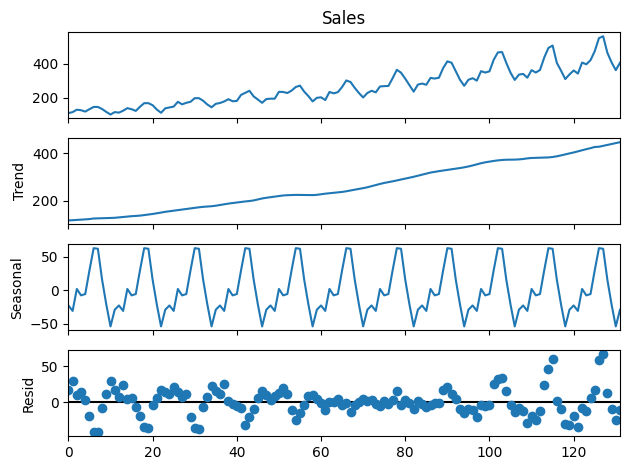

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_data_train.Sales, model='additive', extrapolate_trend='freq', period=12)

decompose.plot().show()

In [7]:
df_train_prophet = df_data_train

# date variable needs to be named «ds» for prophet
df_train_prophet = df_train_prophet.rename(columns={'Month': 'ds'})

# target variable needs to be named «y» for prophet
df_train_prophet = df_train_prophet.rename(columns={'Sales': 'y'})

In [8]:
model_prophet = Prophet()
model_prophet.fit(df_train_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoxoeoz2/x5n8v8in.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoxoeoz2/6_sd7x3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12307', 'data', 'file=/tmp/tmpyoxoeoz2/x5n8v8in.json', 'init=/tmp/tmpyoxoeoz2/6_sd7x3f.json', 'output', 'file=/tmp/tmpyoxoeoz2/prophet_model1ho7sb89/prophet_model-20240909150258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
df_future = model_prophet.make_future_dataframe(periods=12, freq='MS')
display(df_future)

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
139,2023-08-01
140,2023-09-01
141,2023-10-01
142,2023-11-01


In [10]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
139,2023-08-01,532.0,507.0,556.0
140,2023-09-01,484.0,458.0,509.0
141,2023-10-01,446.0,421.0,471.0
142,2023-11-01,416.0,391.0,441.0
143,2023-12-01,449.0,424.0,473.0


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


ValueError: '–' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

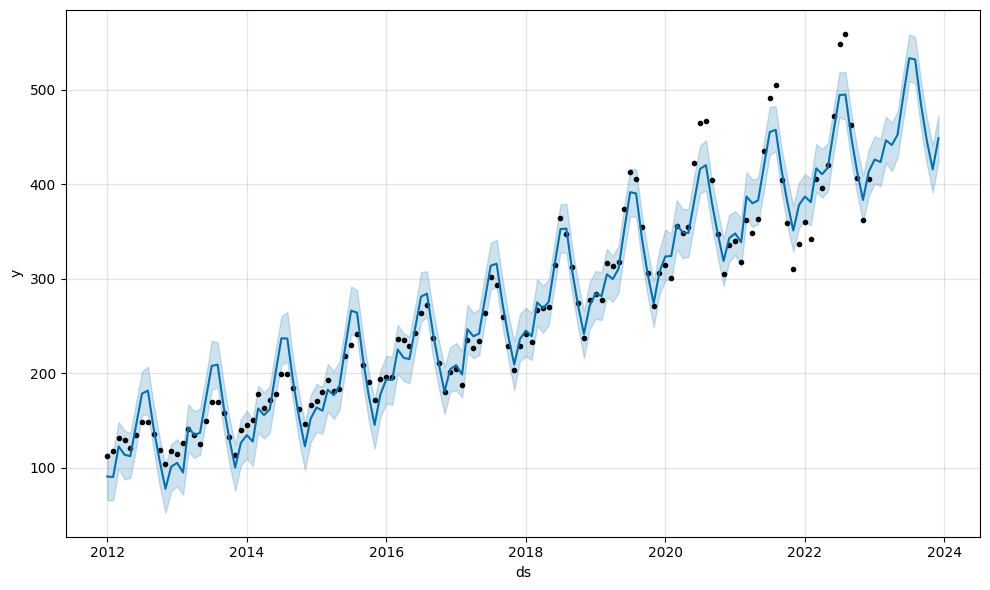

In [11]:
import matplotlib.pyplot as plt

# plot the time series
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_training_date, color='red', linestyle='–', label='Training End')

# plot true test data for the period after the red line
df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])
plt.plot(df_data_test['Month'], df_data_test['Sales'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()